### DATASET Analyses


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir(r'C:\Users\michele.morra\Downloads')
import r_pca

In [2]:
def load_data(file_name):
    data = pd.read_csv(file_name)
    y = data['emotion'].values
    x = data[' pixels'].str.split(' ', expand=True)
    x = x.astype(int).values
    return x, y

def vec2img(vec):
    return np.reshape(vec,(48, 48))

def standardize_data(data):
    return (data - data.mean(axis=0)) / data.std(axis=0)

def split_data(x, y, ratio):
    n = len(x)
    
    ix_train = int(ratio[0] * n)
    ix_valid = ix_train + int(ratio[1] * n)
    
    x_train = x[: ix_train, :]
    y_train = y[: ix_train, ]

    x_valid = x[ix_train : ix_valid, :]
    y_valid = y[ix_train : ix_valid, ]
    
    x_test = x[ix_valid:, :]
    y_test = y[ix_valid:, ]


    return x_train, y_train, x_valid, y_valid, x_test, y_test



In [3]:
_data_path = r'C:\Users\michele.morra\Documents\GitHub\MTH767P_Group4_project\data'

x, y = load_data(_data_path + '/icml_face_data.csv')


In [4]:
emotion_dict = {0: 'Angry', 
                1: 'Disgust', 
                2: 'Fear',
                3: 'Happy', 
                4: 'Sad',
                5: 'Surprise',
                6: 'Neutral'}

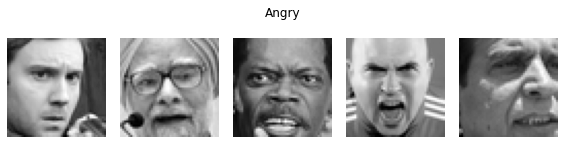

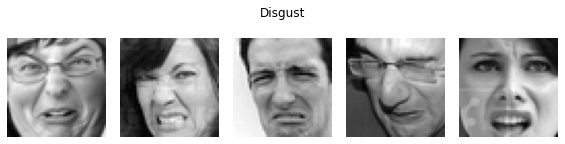

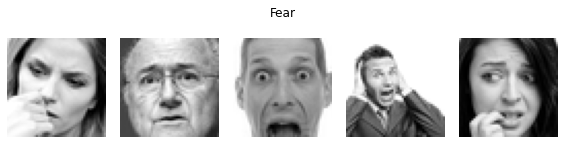

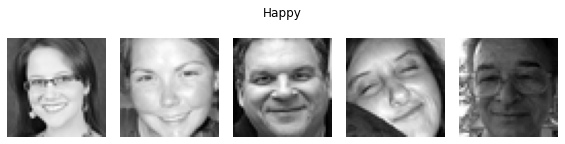

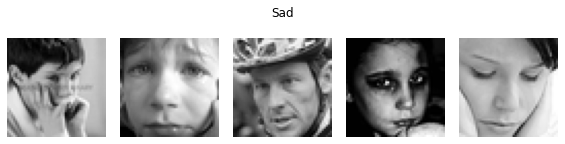

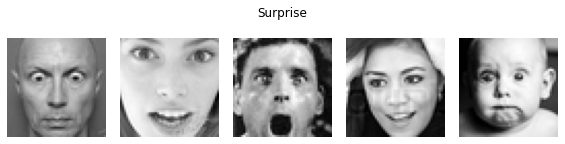

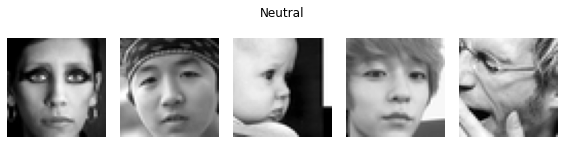

In [5]:
for e in set(y):
    emotion = x[y == e][:5]
    fig, ax = plt.subplots(1, 5, figsize=(8, 2))
    fig.suptitle(emotion_dict[e])
    for i in range(emotion.shape[0]):
        im = vec2img(emotion[i])
        ax[i].imshow(im,cmap='gray')
        ax[i].axis('off')
    plt.tight_layout()

In [25]:
L.reshape(1, -1)

array([[ 70.00512382,  72.2798222 ,  66.70029113, ..., 105.99796846,
         80.2708037 ,  62.02986816]])

In [26]:
x_hat = x.copy()
for i, image in enumerate(x):
   # fig, ax = plt.subplots(1, 3)
    rpca = r_pca.R_pca(image.reshape(48, 48))
    L, S = rpca.fit(max_iter=100, iter_print=101)
    x_hat[i, :] = L.reshape(1, -1)
    
    #ax[0].imshow(image.reshape(48, 48), cmap='gray')
    #ax[1].imshow(L, cmap='gray')
    #ax[2].imshow(S, cmap='gray')

    if (i + 1) % 1000 == 0:
        print(i)


KeyboardInterrupt: 

In [7]:
image

array([111, 106, 107, ...,  95, 107, 101])

In [8]:
x_train, y_train, x_valid, y_valid, x_test, y_test = split_data(x, y, ratio=(0.8, 0, 0.2))
x_train = standardize_data(x_train)
x_test = standardize_data(x_test)

In [9]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter=3000, penalty='l2').fit(x_train, y_train)


KeyboardInterrupt: 

In [ ]:
print('train set accuracy =', clf.score(x_train, y_train))
print('train set accuracy =', clf.score(x_test, y_test))

prediction_test = {}
prediction_train = {}
for i in emotion_dict:
      prediction_train[i] = clf.score(x_train[y_train == i], y_train[y_train == i])
      prediction_test[i] = clf.score(x_test[y_test == i], y_test[y_test == i])
display(prediction_train)
display(prediction_test)

In [ ]:
import seaborn as sns


In [ ]:
accuracy = pd.DataFrame.from_dict(prediction_train, orient='index', columns=['training_set'])
accuracy['test_set'] = pd.Series(prediction_test)
accuracy['drop'] = accuracy['test_set'] - accuracy['training_set']
accuracy = accuracy.rename(emotion_dict, axis=0)
sns.heatmap(accuracy, annot=True, fmt='.0%', cbar=None, cmap='RdBu', alpha=0.7, square=False)


In [ ]:

y_hat = clf.predict(x_test)
combination = np.zeros((7, 7))
for i in range(len(y_test)):
    r = y_hat[i]
    c = y_test[i]
    combination[int(r), int(c)] = combination[int(r), int(c)] + 1
combination = combination / combination.sum(axis=1).reshape(-1,1)


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(combination, annot=True, fmt='.0%', cbar=None, cmap='RdBu', alpha=0.7, square=True, ax=ax)
ax.set_title('confusion matrix (test set) \n multinomial logistic')
ax.set_xlabel('actual')
ax.set_ylabel('predicted')



In [ ]:
combination.sum(axis=1)